# Homework - 3
***
**Name**: Nishank Sharma
***

This assignment is due on Canvas by **5pm on Friday October 19th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.

### Problem - 1 [5 points]

Consider a single Boolean random variable $Y$ (the "classification"). Let the prior probability $P(Y= true)$ be $\pi$. Let's try to find $\pi$, given a training set $D = (y_1,\cdots, y_N)$ with $N$ independent samples of $Y$. Furthermore, suppose $p$ of the $N$ samples are positive (i.e, labeled as true) and $n$ of the $N$ samples are negative.

1. Write down an expression for the likelihood of $D$ (that is, the probability of seeing this particular sequence of examples, given a fixed value of $\pi$) in terms of $\pi$, $p$ and $n$.

***
*Solution:*

$P(D) = P(y_1)P(y_2)...P(y_n)$

$P(D) =$  $ \pi^p (1-\pi)^{n-p} $

***

2. By differentiating the log likelihood $L$, find the value of $\pi$ that maximizes the likelihood

3. Write down the likelihood for the data including the attributes, using the following additional notation:

    * $\alpha_i$ is $P(X_i = true | Y = true)$
    * $\beta_i$ is $P(X_i = true | Y = false)$
    * $p_i^+$ is the count of samples for which $X_i = true$ and $Y = true$
    * $n_i^+$ is the count of samples for which $X_i = false$ and $Y = true$
    * $p_i^-$ is the count of samples for which $X_i = true$ and $Y = false$
    * $n_i^-$ is the count of samples for which $X_i = false$ and $Y = false$

4. By differentiating the log likelihood L, find the values of $\alpha_i$ and $\beta_i$ (in terms of the various counts) that maximize the likelihood

### Classification with "Naive Bayes" generative model [10 points]

In [10]:
from scipy.io import loadmat

class SPECT:
    def __init__(self):
        ff = lambda x, y : loadmat(x)[y]
        
        self.X_train = ff('data/SPECTtrainData.mat','trainData')
        self.y_train = ff('data/SPECTtrainLabels.mat','trainLabels')
        
        self.X_test = ff('data/SPECTtestData.mat', 'testData')
        self.y_test = ff('data/SPECTtestLabels.mat', 'testLabels')

In [11]:
# Label normal : 1 abnormal : 0
data1 = SPECT()

You are given the `SPECT` class with train and test data. These were created from the medical data on cardiac Single Proton Emission Tomography (SPECT) images of patients and each patient is classified into two categories: normal or abnormal. The database of 267 SPECT images sets (patients) was processed to extract features that summarize the original SPECT images. As a result, you are given a training set of 187 patterns and a test set of 80 patterns, each with 22 binary feature. The goal is to build a generative model of each group (normal: 1 and abnormal: 0), and to use these models to classify future patients. 

For each of the groups, use the training data to build a probabilistic model, assuming that the different features are independent. The model for a group should have 22 parameters $p_i \in [0,1]$; the probability of a particular data point $x \in \{0, 1\}^{22}$ is then

$$\prod_{i=1}^{22}p_i^{x_i}(1-p_i)^{1-x_i}$$

A natural choice is to set $p_i$ to the proportion of training documents (from that particular group) for which $x_i = 1$. In practice, this can be dangerous - when these are lots of features, and any given feature is 1 only a tiny fraction of the time, there often isn't enough data to reliably estimate all the $p_i$ in this way. Therefore, it is common to smooth the estimates somewhat, by setting:

$$ p_i = \frac{\text{(number of points with $x_i = 1$)} + n\tilde{p}}{\text{(number of points)} + n}$$

where n is a small integer and $\tilde{p}$ is a prior estimate of the value of $p_i$. To keep this simple, use $n=2$ and $\tilde{p}=0.5$

**Q:** Now implement Naive Bayes model to classify the test examples. Recall that `NaiveBayes` assumes that the conditional property of the features is independent given the label variable.

   * Finish `fit` method to generate probabilistic model for both the groups
   * Finish `predict` method to return predicted label for the data point 

In [63]:
import numpy as np
from collections import Counter
class NaiveBayes:
    def __init__(self, n = 2, prior = 0.5):
        """
        Create a NaiveBayes classifier
        :param n : small integer
        :param prior: prior estimate of the value of pi
        """
        
        self.n = n
        self.prior = prior
        self.normal_model = []
        self.abnormal_model = []
        self.prob0 = None
        self.prob1 = None
        
    def fit(self, X_train, y_train):
        """
        Generate probabilistic models for normal and abmornal group.
        Use self.normal_model and self.abnormal_model to store 
        models for normal and abnormal groups respectively
        """
        #TODO: Finish this function=
        self.prob0 = len(y_train[np.where(y_train==0)])/len(y_train)
        self.prob1 = len(y_train[np.where(y_train==1)])/len(y_train)
        
        x0 = []
        x1 = []
        
        for i in range(len(X_train)):
            if(y_train[i] == 1):
                x1.append(X_train[i])
            else:
                x0.append(X_train[i])
        
        x0 = np.array(x0)
        x1 = np.array(x1)
        
        x0l = len(x0)
        x1l = len(x1)
        
        for i in range(22):
            
            px0 = len(x0[np.where(x0[:,i]==1)] + self.n * self.prior)/(x0l + self.n)
            px1 = len(x1[np.where(x1[:,i]==1)] + self.n * self.prior)/(x1l + self.n)

            self.normal_model.append(px1)
            self.abnormal_model.append(px0)
                
    
    def predict(self, data):
        """
        Return predicted label for the input example
        :param data: input example
        """
        #TODO: Finish this function
        yhat = []
        
        for i in data:
            pn = 1
            pab = 1
            pnor = self.normal_model
            pabn = self.abnormal_model
            
            for j in range(22):
                
                pn*=(pnor[j]**i[j])*(1-pnor[j])**(1-i[j])
                pab*=(pabn[j]**i[j])*(1-pabn[j])**(1-i[j])
            
            if((pn*self.prob1)>(pab*self.prob0)):
                yhat.append(1)
            else:
                yhat.append(0)
        return yhat
    
    def accuracy(self,y,yhat):
        cr = 0
        for i in range(0,len(y)):
            if(yhat[i]==y[i]):
                cr+=1

        return(str((cr/len(yhat)*100)))       

**Q:** Find the error rate of your Naive Bayes algorithm on the test set

In [64]:
n = NaiveBayes()
n.fit(data1.X_train,data1.y_train)
yhat = n.predict(data1.X_test)
print("Accuracy: "+n.accuracy(data1.y_test,yhat)+"%")

Accuracy: 80.0%


### Logistic Regression - [15 points]

In [2]:
import matplotlib.pylab as plt
%matplotlib inline
import pickle, gzip       
import numpy as np

class Numbers:
    """
    Class to store MNIST data for images of 9 and 8 only
    """ 
    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)
 
        self.train_x, self.train_y = train_set
        train_indices = np.where(self.train_y > 7)
        self.train_x, self.train_y = self.train_x[train_indices], self.train_y[train_indices]
        self.train_y = self.train_y - 8
 
        self.valid_x, self.valid_y = valid_set
        valid_indices = np.where(self.valid_y > 7)
        self.valid_x, self.valid_y = self.valid_x[valid_indices], self.valid_y[valid_indices]
        self.valid_y = self.valid_y - 8

In [3]:
data2 = Numbers('data/mnist.pklz')

In this homework you'll implement a Logistic Regression classifier to take drawings of either an eight or a nine and output corresponding label.
* Finish the `sigmoid` function to return the output of applying the sigmoid function the input parameter

* Finish the `sgd_update` function so that it performs stochastic gradient descent on the single training example and updates the weight vector correspondingly

In [4]:
from collections import defaultdict
import numpy as np
class LogReg:
    
    def __init__(self, num_features, eta):
        """
        Create a logistic regression classifier
        :param num_features: The number of features (including bias)
        :param eta: Learning rate (the default is a constant value)
        """
        
        self.w = np.zeros(num_features)
        self.eta = eta
        
        
    def sgd_update(self, x_i, y):
        """
        Compute a stochastic gradient update to improve the log likelihood.
        :param x_i: The features of the example to take the gradient with respect to
        :param y: The target output of the example to take the gradient with respect to
        :return: Return the new value of the regression coefficients
        """
 
        # TODO: Finish this function to do a single stochastic gradient descent update
        # and return the updated weight vector
     
        e =self.sigmoid(self.w.dot(x_i))-y
        
        self.w = self.w - self.eta*e*x_i
            
        return self.w
    
    def sigmoid(self, score, threshold = 20.0):
        """
        Prevent overflow of exp by capping activation at 20.
        :param score: A real valued number to convert into a number between 0 and 1
        """
        
        if abs(score.any()) > threshold:
            score = threshold * np.sign(score)
            
        # TODO: Finish this function to return the output of applying the sigmoid
        # function to the input score (Please do not use external libraries)
           # if score > threshold, cap value at score 
   
        return 1.0 / (1.0 + np.exp(-score)) 
    
    def progress(self, examples_x, examples_y):
        """
        Given a set of examples, computes the probability and accuracy
        :param examples: The dataset to score
        :return: A tuple of (log probability, accuracy)
        """
 
        logprob = 0.0
        num_right = 0
        for x_i, y in zip(examples_x, examples_y):
            p = self.sigmoid(self.w.dot(x_i))
            if y == 1:
                logprob += np.log(p)
            else:
                logprob += np.log(1.0 - p)
 
            # Get accuracy
            if abs(y - p) < 0.5:
                num_right += 1
 
        return logprob, float(num_right) / float(len(examples_y))

**Q:** After completing the class above, loop over the training data and perform stochastic gradient descent for three different user-defined number of epochs, and five different values of eta range [1e-3, 1]. Train your model and do the following:

* Using the `progress` method, calculate the accuracy on the training and the valid sets every 100 iterations. Plot them on same graph for every comparison.

* Using `progress` method, calculate the accuracy on the validation set and store it for every epoch.

Don't forget to shuffle your training data after each epoch.

In [85]:
import random
# Loop over training data and perform updates
# Sample code:
# lr = LogReg(data2.train_x.shape[1], eta)
# iteration = 0
# for epoch in range(epochs):
# shuffle the data

eta = [0.0001,0.001,0.01,0.1,1]
epochs = [100,200,300]
accr = []
acclgt = []
act = []
acv = []
ecount = []
c = 0

for e in eta:
    ac =[]
    acclg = []
    l = LogReg(data2.train_x.shape[1], e)
    for epoch in epochs:
        for ep in range(epoch):
            
            #shuffling x and y
            x = data2.train_x
            y = data2.train_y
            z = list(zip(x, y))
            np.random.shuffle(z)
            x, y = zip(*z)
            
            for i in range(len(x)):
                l.sgd_update(x[i],y[i])
                
            lgv,a = l.progress(data2.valid_x,data2.valid_y)
            lgt,eat = l.progress(data2.train_x,data2.train_y)
            
            ac.append(a)
            acclg.append(lgt)
            
            if(ep%100 == 0):
                lgt,at = l.progress(data2.train_x,data2.train_y)
                act.append(at)
                lgv,av = l.progress(data2.valid_x,data2.valid_y)
                acv.append(av)
                c+=1
                cur = 100*c
                ecount.append(cur)
                
    accr.append(ac)
    acclgt.append(acclg)

KeyboardInterrupt: 

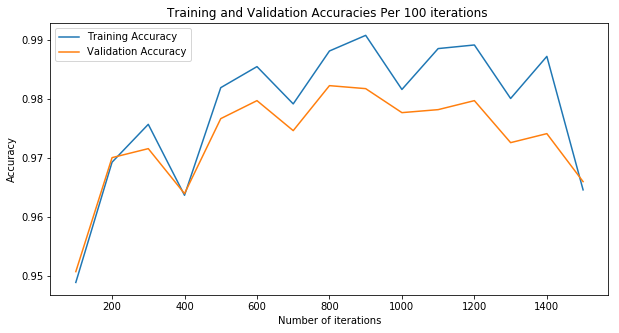

In [84]:
plt.figure(figsize=(10,5))
plt.plot(ecount, act, label='Training Accuracy')
plt.title('Training and Validation Accuracies Per 100 iterations ')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.plot(ecount, acv, label='Validation Accuracy')
plt.legend()
plt.show()

**Q:** Describe the role of learning rate (eta) on the efficiency of convergence during training?

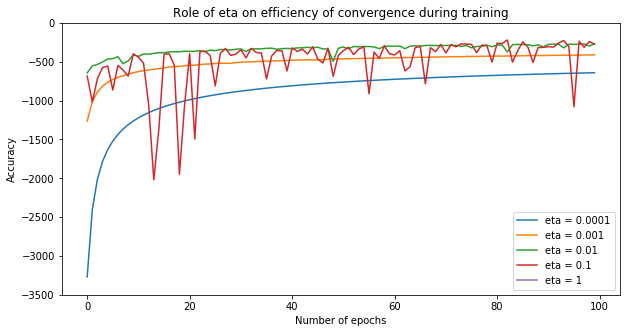

In [81]:
plt.figure(figsize=(10,5))
plt.title('Role of eta on efficiency of convergence during training')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
count = list(range(0, 100))
plt.ylim((-3500, 0))
plt.plot(count,acclgt[0],label='eta = 0.0001')
plt.plot(count,acclgt[1],label='eta = 0.001')
plt.plot(count,acclgt[2],label='eta = 0.01')
plt.plot(count,acclgt[3],label='eta = 0.1')
plt.plot(count,acclgt[4],label='eta = 1')
plt.legend()
plt.show()

***
As we can see from the graph above, increasing $eta$ from 1e-4 to 1e-2 increases the accuracy of the model, but after that accuracy decreases from 1e-1 to 1. This shows that taking a small learning rate results in model converging too late and our weight may overshoot the global minima and hence gives lower accuracy, whereas taking a larger learning rate results in model converging too early and our weight may end up in local minima or never reaches the global minima thus giving lower accuracy. So taking a learning rate between those two, like $eta = 0.01$ is the best bet.
***

**Q:** Describe the role of the number of epochs on validation accuracy?

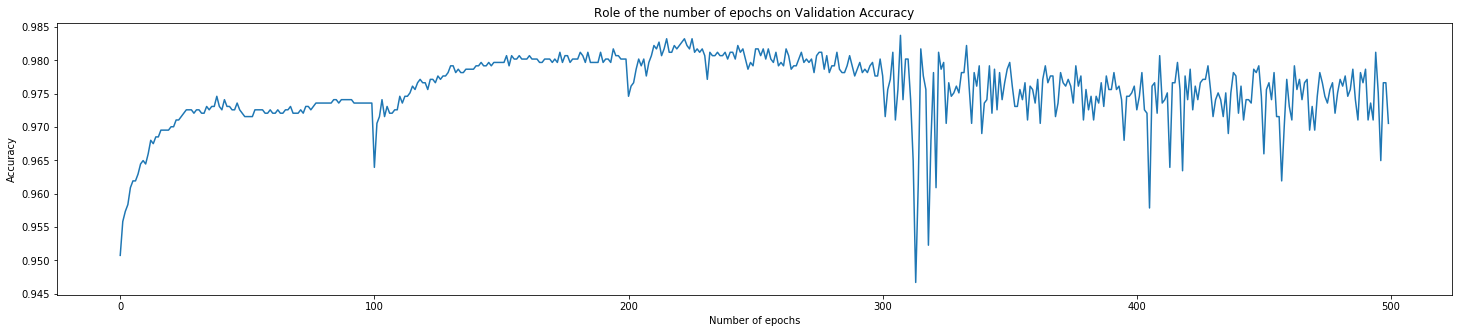

In [78]:
plt.figure(figsize=(2,5))
plt.title('Role of the number of epochs on Validation Accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
accuval = accr[0]+accr[1]+accr[2]+accr[3]+accr[4]
count = list(range(0,500))
plt.plot(count, accuval)
plt.show()


***
This plot gives a good depiction of relationship between number of epochs and validation accuracy. We see the graph slowly rising with small dives till epoch = 250-300, after that we see a gradual decline and deeper dives which show that increasing the number of epochs increases the accuracy of a model till a certain point, after which it tends to overfit and there is either decrease in accuracy or no further increase. In this case that number seems to be somewhere between 200-225 epochs.
***